In [1]:
import pandas as pd

from config import BASE_DIR

BASELINE_DIR = f"{BASE_DIR}/experiments/baselines"
BASELINE_GNN_DIR = f"{BASE_DIR}/experiments/gnn/gcn_init"


In [2]:
import os


def list_files(dir):
    filenames = []
    for root, dirs, files in os.walk(dir):
        for file in files:
            filenames.append(file)
    return filenames


print(list_files(BASELINE_DIR))
print(list_files(BASELINE_GNN_DIR))

['dataset_scroll.pkl', 'processed_vectorizers.pkl', 'dataset_composition.pkl', 'composition_unsupervised.csv', 'section_supervised.csv', 'section_unsupervised.csv', 'book_unsupervised.csv', 'composition_supervised.csv', 'book_supervised.csv', 'dataset_sectarian.pkl', 'datasets.pkl']
['gcn_init_section_2_adj_types.csv', 'gcn_init_composition_2_adj_types.csv', 'gcn_init_book_2_adj_types.csv']


In [3]:
tasks = ["book", "composition", "section"]

compare_list = {
    "book": [f"{BASELINE_DIR}/book_supervised.csv", f"{BASELINE_GNN_DIR}/gcn_init_book_2_adj_types.csv"],
    "composition": [f"{BASELINE_DIR}/composition_supervised.csv",
                    f"{BASELINE_GNN_DIR}/gcn_init_composition_2_adj_types.csv"],
    "section": [f"{BASELINE_DIR}/section_supervised.csv", f"{BASELINE_GNN_DIR}/gcn_init_section_2_adj_types.csv"]
}

In [4]:

COMPARISON_SCHEME = ["task", "model", "vectorizer", "test_acc", "weighted_f1", "micro_f1", "macro_f1", "adj_type"]

In [5]:
pd.read_csv(compare_list["book"][1]).sort_values(by="test_acc", ascending=False)

,epoch,train_loss,train_acc,val_loss,val_acc,test_loss,test_acc,micro_precision,micro_recall,micro_f1,...,weighted_f1,num_adjs,epochs,hidden_dim,distance,learning_rate,threshold,bert_model,adj_type,num_edges
0,82,0.397447,0.857143,1.478536,0.622642,1.053334,0.709779,0.709779,0.709779,0.709779,...,0.667393,1,500,300,cosine,0.001,0.99,dicta-il/BEREL,tfidf,9391
2,97,0.365911,0.862637,1.508394,0.594340,1.073368,0.709779,0.709779,0.709779,0.709779,...,0.671182,1,500,300,cosine,0.001,0.99,yonatanlou/BEREL-finetuned-DSS-maskedLM,tfidf,9391
1,86,0.360082,0.858974,1.426633,0.622642,1.099694,0.709779,0.709779,0.709779,0.709779,...,0.667449,1,500,300,cosine,0.001,0.99,yonatanlou/alephbert-base-finetuned-DSS-maskedLM,tfidf,9391
3,79,0.345296,0.862637,1.408783,0.584906,1.060365,0.706625,0.706625,0.706625,0.706625,...,0.670602,1,500,300,cosine,0.001,0.99,onlplab/alephbert-base,tfidf,9391
4,93,0.356467,0.868132,1.344640,0.584906,1.045396,0.694006,0.694006,0.694006,0.694006,...,0.648794,1,500,300,cosine,0.001,0.99,dicta-il/dictabert,tfidf,9391
5,153,0.307504,0.873626,1.502776,0.556604,1.134181,0.690852,0.690852,0.690852,0.690852,...,0.657017,1,500,300,cosine,0.001,0.99,yonatanlou/dictabert-finetuned-DSS-maskedLM,tfidf,9391
6,65,0.479842,0.844322,1.728684,0.575472,1.467061,0.602524,0.602524,0.602524,0.602524,...,0.553709,2,500,300,cosine,0.001,0.99,dicta-il/dictabert,tfidf & trigram,9391
7,59,0.603878,0.831502,2.040673,0.433962,1.527071,0.599369,0.599369,0.599369,0.599369,...,0.529662,2,500,300,cosine,0.001,0.99,dicta-il/BEREL,tfidf & BOW-n_gram,9391
8,62,0.550784,0.835165,1.979438,0.433962,1.495714,0.593060,0.593060,0.593060,0.593060,...,0.537070,2,500,300,cosine,0.001,0.99,dicta-il/dictabert,tfidf & BOW-n_gram,9391
9,49,0.592757,0.827839,1.813419,0.518868,1.504192,0.589905,0.589905,0.589905,0.589905,...,0.518284,2,500,300,cosine,0.001,0.99,onlplab/alephbert-base,tfidf & trigram,9391


In [6]:

results = []
for task in tasks:
    baseline = pd.read_csv(compare_list[task][0])
    baseline = baseline.rename(columns={"accuracy": "test_acc"})
    baseline = baseline[baseline["model"].isin(["LogisticRegression", "MLPClassifier"])]
    baseline = baseline.sort_values(by="test_acc", ascending=False)
    baseline["task"] = task
    baseline["adj_type"] = None
    baseline = baseline.head(1)
    results.append(baseline[COMPARISON_SCHEME].to_dict(orient="records"))

    gnn = pd.read_csv(compare_list[task][1])
    gnn = gnn.rename(columns={"bert_model": "vectorizer"})

    max_idx = gnn.groupby('vectorizer')['val_acc'].idxmax()
    max_test_acc_rows = gnn.loc[max_idx]
    max_test_acc_rows["model"] = "GCN"
    max_test_acc_rows["task"] = task
    max_test_acc_rows = max_test_acc_rows.sort_values(by="test_acc", ascending=False).head(1)
    results.append(max_test_acc_rows[COMPARISON_SCHEME].to_dict(orient="records"))

all_results = pd.DataFrame([item for sublist in results for item in sublist])
all_results

,task,model,vectorizer,test_acc,weighted_f1,micro_f1,macro_f1,adj_type
0,book,MLPClassifier,onlplab/alephbert-base,0.618297,0.569937,0.618297,0.411291,None
1,book,GCN,dicta-il/BEREL,0.709779,0.667393,0.709779,0.553160,tfidf
2,composition,MLPClassifier,dicta-il/BEREL,0.768730,0.747661,0.768730,0.566354,None
3,composition,GCN,dicta-il/dictabert,0.827362,0.815219,0.827362,0.739659,tfidf
4,section,MLPClassifier,yonatanlou/dictabert-finetuned-DSS-maskedLM,0.978495,0.978022,0.978495,0.943976,None
5,section,GCN,onlplab/alephbert-base,0.994624,0.994566,0.994624,0.986294,tfidf


In [7]:

def get_group_by_vectorizer(i):
    if "yonatanlou" in i:
        return 'fine_tuned'
    elif "dicta" in i or "onlplab" in i:
        return 'pre_trained_bert'
    else:
        return 'classic_text_features'


all_results["vectorizer_type"] = all_results["vectorizer"].apply(get_group_by_vectorizer)



In [8]:

def generate_color_map(df, col, group_name, base_color="PuOr", base_color_by_group=None):
    groups = df.groupby(group_name)[col].apply(list).to_dict()
    num_groups = df[col].nunique()
    all_colors = list(sns.color_palette(base_color, num_groups))
    color_map = {}
    i = 0
    if not base_color_by_group:
        for group, items in groups.items():
            items = list(set(items))

            for item in items:
                color_map[item] = all_colors[i]
                i += 1
        return color_map

    # Function to generate shades of a base color
    def generate_shades(base_color, num_shades):
        # return sns.hls_palette(num_shades, h=base_color, l=0.5, s=0.5)

        return sns.color_palette(base_color, n_colors=num_shades + 1)

    # Create the color map
    color_map = {}
    for group, items in groups.items():
        shades = generate_shades(base_color_by_group[group], len(items))
        for item, shade in zip(items, shades):
            color_map[item] = shade
    return color_map


base_color_by_group = {
    'classic_text_features': "coolwarm",  # Red
    'pre_trained_bert': "viridis",  # Green
    'fine_tuned': "Spectral"  # Blue
}



In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_bar_plot(all_results, x_col, y_col, hue_col, vectorizer_type_col, color_map, filename,
                      which_hue_cols=False):
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(nrows=len(all_results['task'].unique()), ncols=1,
                             figsize=(12, 6 * len(all_results['task'].unique())), sharey=False)
    all_results['task'] = all_results['task'].replace("section", "sectarian")
    for i, task in enumerate(all_results['task'].unique()):
        # Filter data for the current task
        task_data = all_results[all_results['task'] == task]
        if which_hue_cols is not None:
            task_data = task_data[task_data[hue_col].isin(which_hue_cols)]

        sns.barplot(ax=axes[i], x=x_col, y=y_col, hue=hue_col, data=task_data, palette=color_map)
        axes[i].set_title(f'{y_col} by {hue_col} by {x_col} for {task}', fontsize=16)

        # Adjusting the y-axis limits
        min_y_col = task_data[y_col].min()
        max_y_col = task_data[y_col].max()
        padding = (max_y_col - min_y_col) * 0.1
        axes[i].set_ylim(min_y_col - padding, max_y_col + padding)

        axes[i].set_xlabel('Model', fontsize=14)
        axes[i].set_ylabel(y_col, fontsize=14)
        axes[i].tick_params(axis='x', rotation=45)

        # axes[i].get_legend().remove()

        # Get handles and labels, then sort them by the vectorizer_type column
        handles, labels = axes[i].get_legend_handles_labels()

        # Create a dataframe for sorting
        legend_df = pd.DataFrame({'label': labels, 'handle': handles})
        legend_df = legend_df.merge(all_results[[hue_col, vectorizer_type_col]].drop_duplicates(), left_on='label',
                                    right_on=hue_col)
        legend_df = legend_df.sort_values(by=vectorizer_type_col)

        # Extract sorted handles and labels
        sorted_handles = legend_df['handle'].tolist()
        sorted_labels = legend_df['label'].tolist()
        axes[i].legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        axes[i].grid(alpha=0.5)

    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()


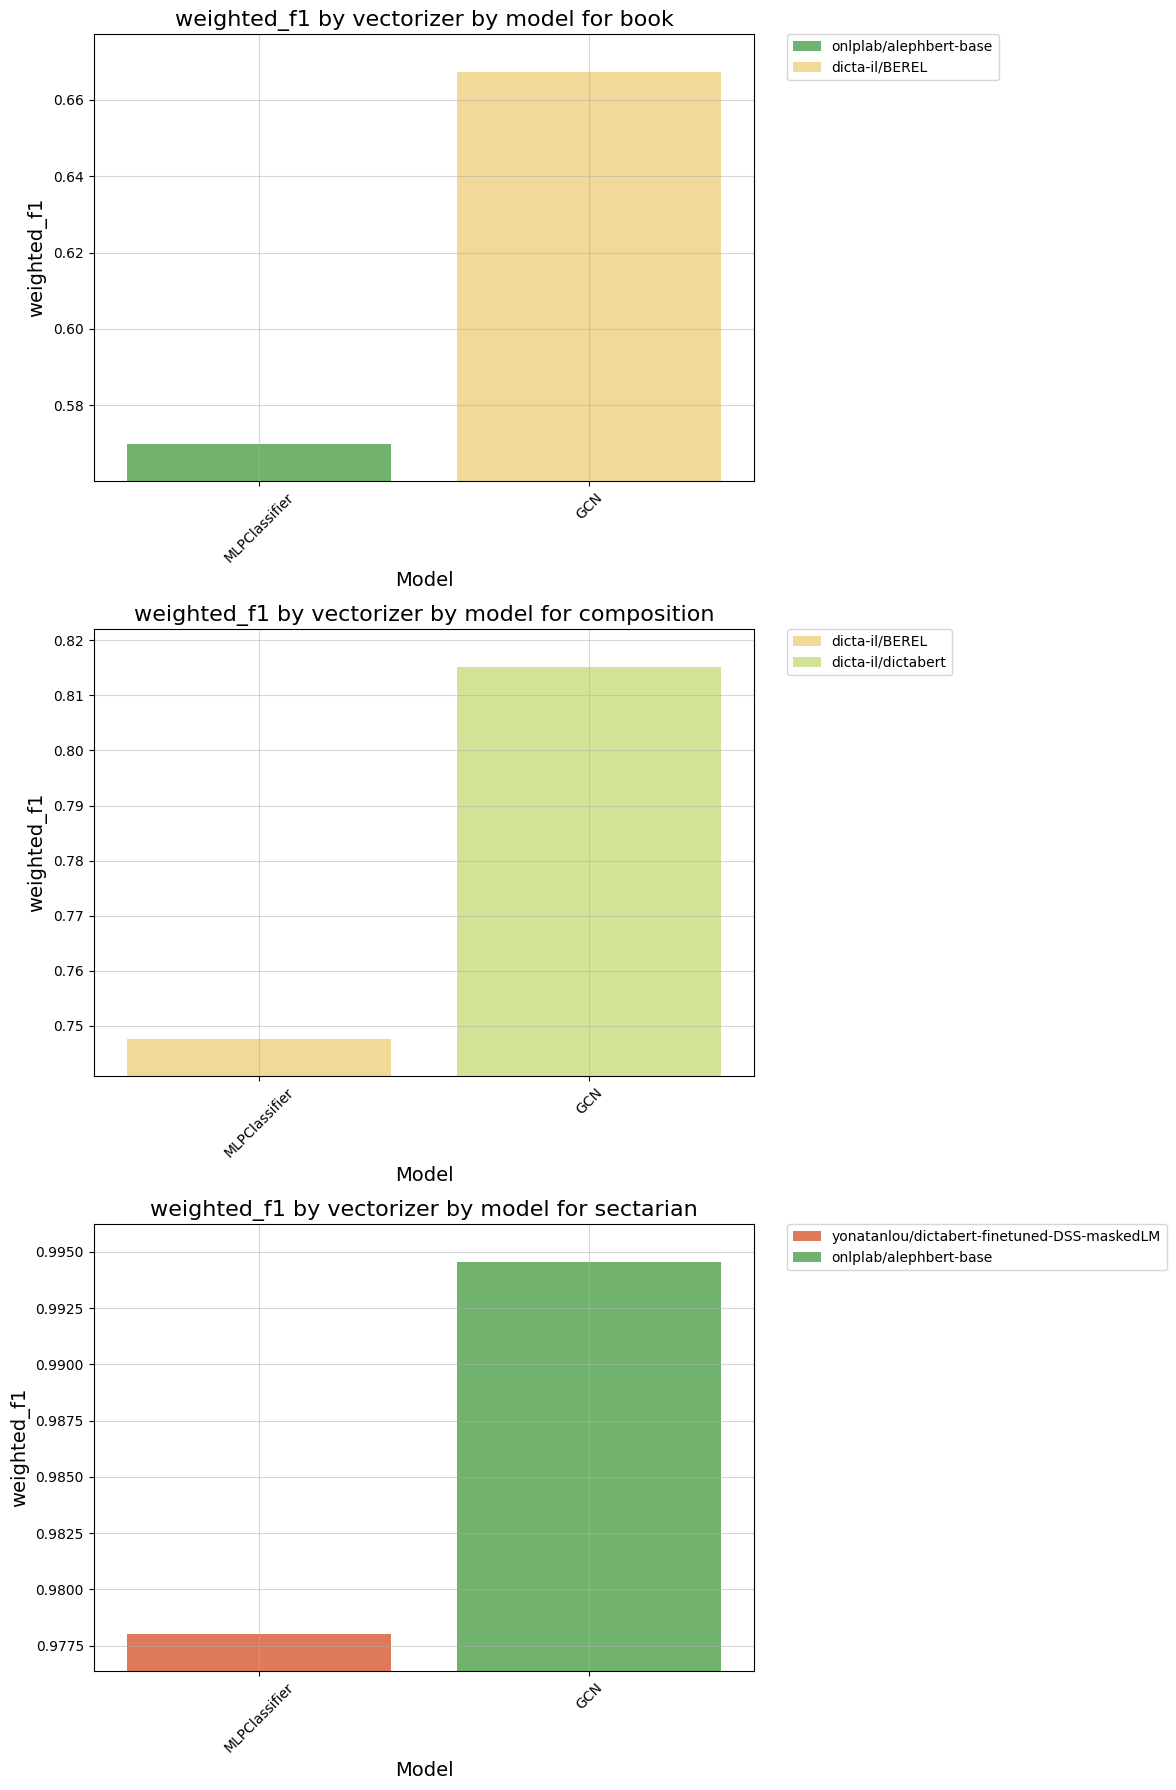

In [10]:

color_map = generate_color_map(all_results, "vectorizer", "vectorizer_type", "RdYlGn", None)
# file_name = f"{BASE_DIR}/reports/plots/comparison/classification_comparison_composition_sectarian.png"
file_name = None
# hue_cols = list(all_results[all_results["model"]=="GCN"]["vectorizer"].unique())+["trigram"]
hue_cols = list(all_results["vectorizer"].unique())
plot_obj = generate_bar_plot(all_results, "model", "weighted_f1", "vectorizer", "vectorizer_type", color_map,
                             filename=file_name, which_hue_cols=hue_cols)

In [11]:

results_gnn = []
for task in tasks:
    gnn = pd.read_csv(compare_list[task][1])
    gnn = gnn.rename(columns={"bert_model": "vectorizer"})

    gnn["model"] = "GCN"
    gnn["task"] = task

    results_gnn.append(gnn.to_dict(orient="records"))

all_results_gnn = pd.DataFrame([item for sublist in results_gnn for item in sublist])
all_results_gnn.columns

Index(['epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc', 'test_loss',
       'test_acc', 'micro_precision', 'micro_recall', 'micro_f1',
       'macro_precision', 'macro_recall', 'macro_f1', 'weighted_precision',
       'weighted_recall', 'weighted_f1', 'num_adjs', 'epochs', 'hidden_dim',
       'distance', 'learning_rate', 'threshold', 'vectorizer', 'adj_type',
       'num_edges', 'model', 'task'],
      dtype='object')

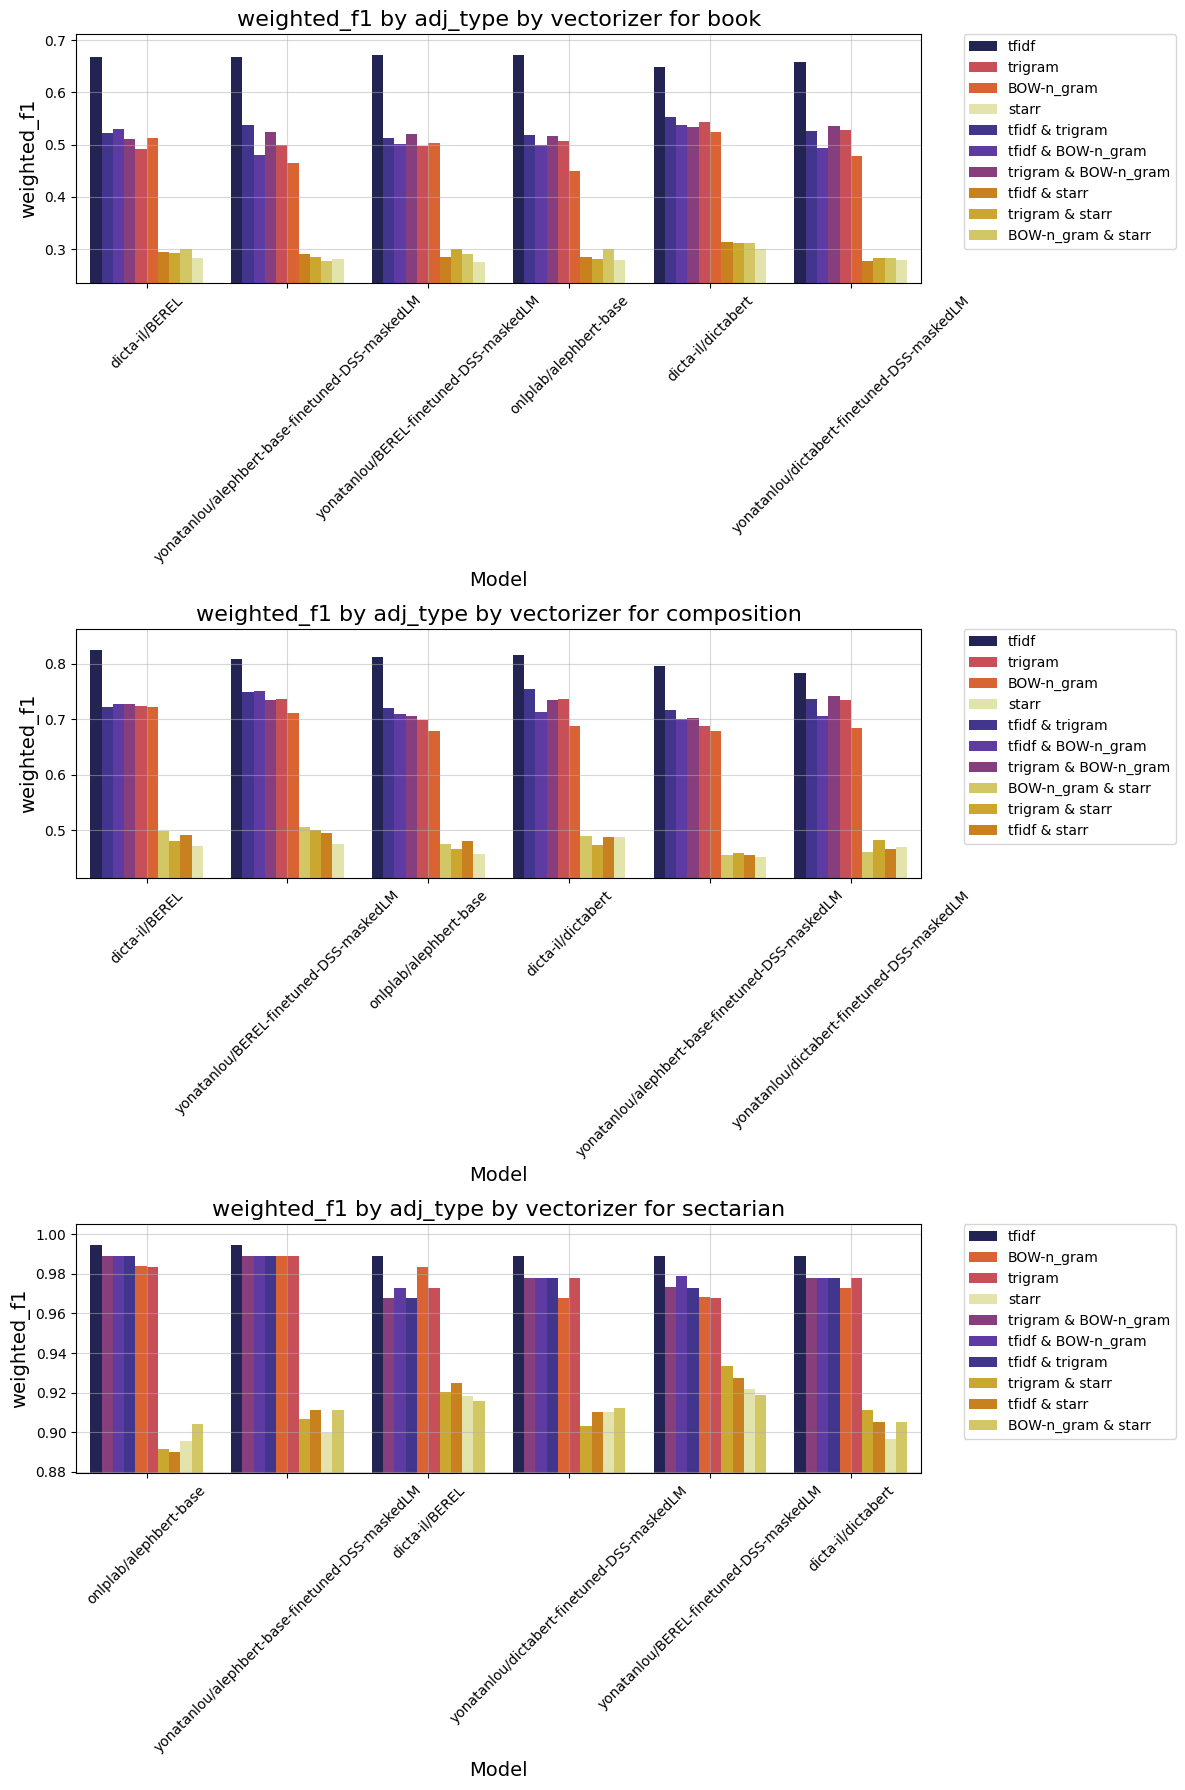

In [12]:
adj_types = all_results_gnn['adj_type'].unique()
palette = sns.color_palette("CMRmap", len(adj_types))
color_dict = dict(zip(adj_types, palette))
file_name = f"{BASE_DIR}/experiments/gnn/comparsion_plot_all_tasks_different_adj.png"

generate_bar_plot(all_results_gnn, "vectorizer", "weighted_f1", "adj_type", "num_adjs", color_dict, filename=file_name,
                  which_hue_cols=None)

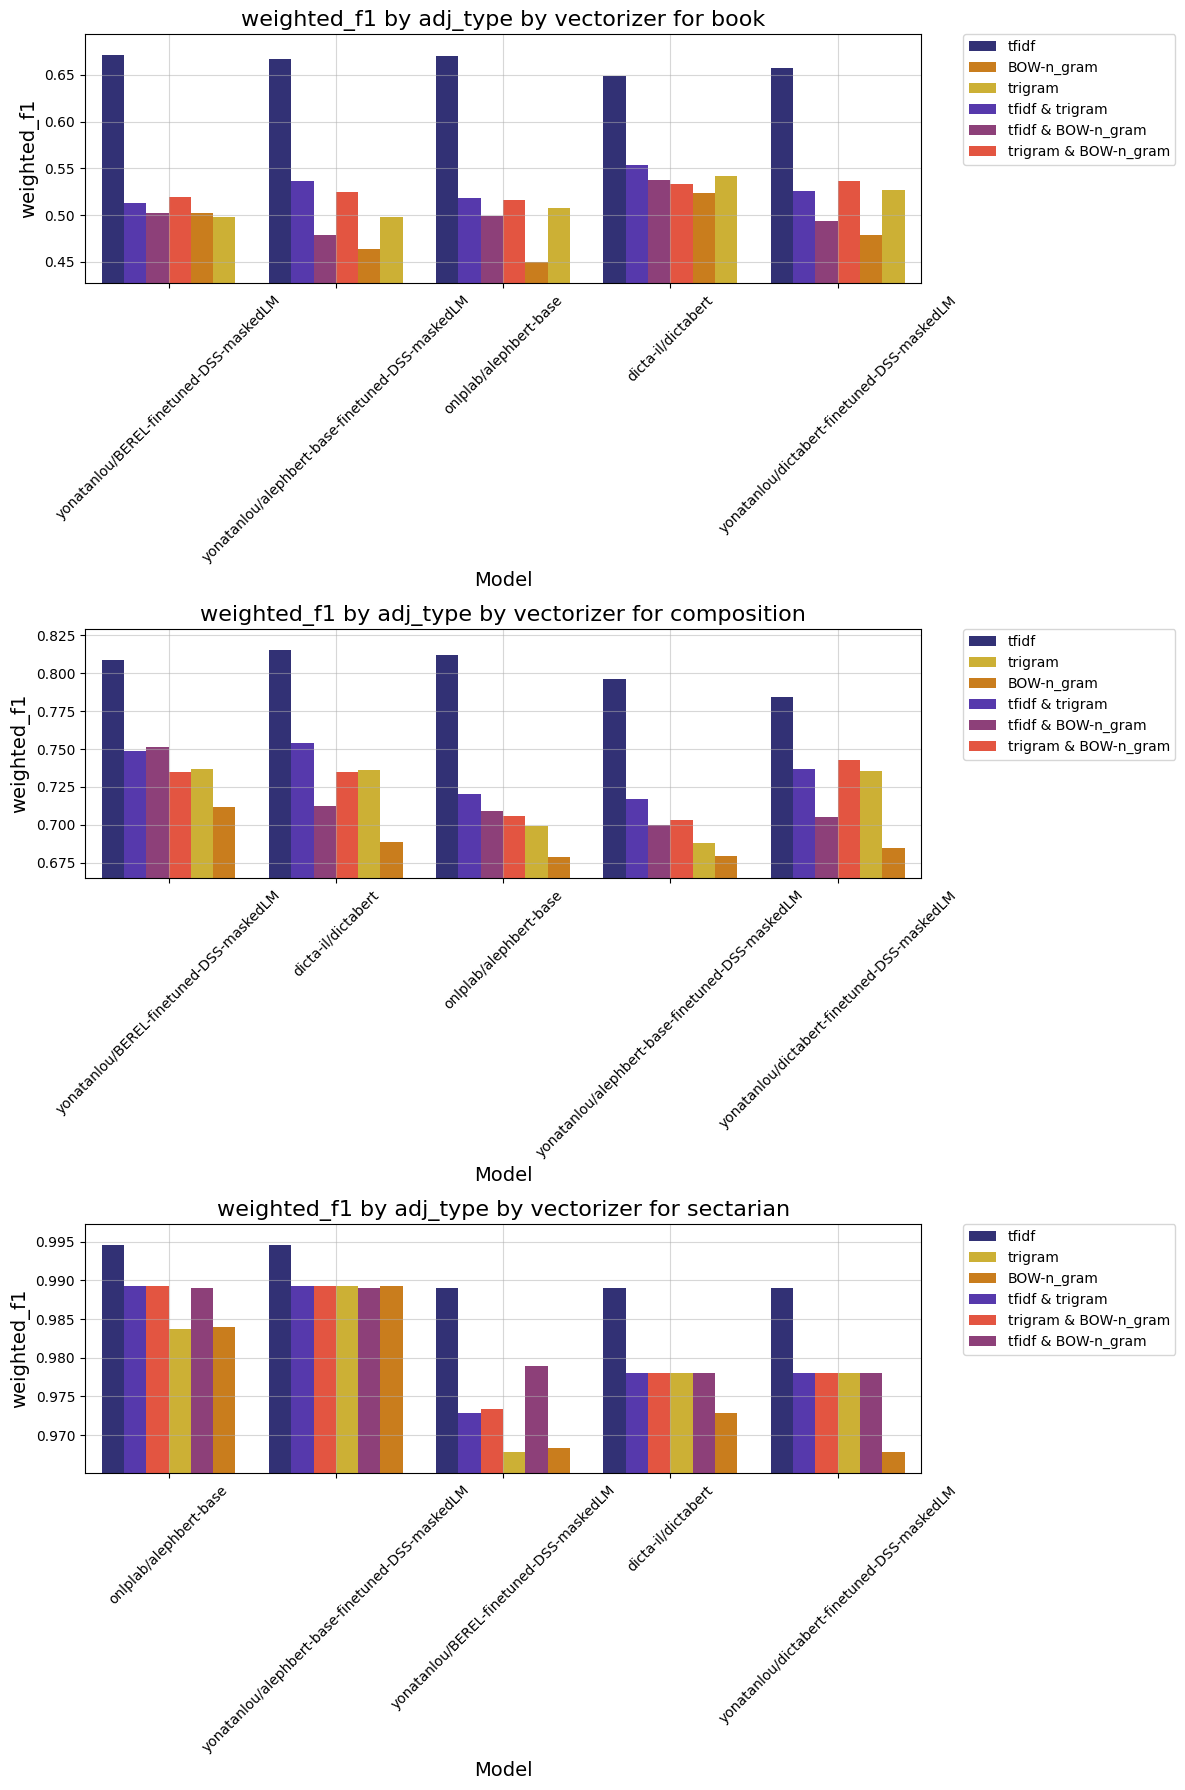

In [14]:
which_hue_cols = ['trigram',
                  'tfidf & trigram',
                  'tfidf',
                  'tfidf & trigram & BOW-n_gram',
                  'trigram & BOW-n_gram',
                  'BOW-n_gram',
                  'tfidf & BOW-n_gram']
palette = sns.color_palette("CMRmap", len(which_hue_cols))
color_dict = dict(zip(adj_types, palette))
generate_bar_plot(all_results_gnn, "vectorizer", "weighted_f1", "adj_type", "num_adjs", color_dict, filename=None,
                  which_hue_cols=which_hue_cols)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


def generate_bar_plot(all_results, x_col, y_col, hue_col, vectorizer_type_col, color_map, filename,
                      which_hue_cols=False):
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(nrows=1, ncols=len(all_results['task'].unique()), figsize=(10, 5), sharey=False)
    all_results['task'] = all_results['task'].replace("section", "sectarian")

    for i, task in enumerate(all_results['task'].unique()):
        # Filter data for the current task
        task_data = all_results[all_results['task'] == task]

        sns.barplot(ax=axes[i], x=x_col, y=y_col, data=task_data, palette=color_map)
        axes[i].set_title(f'{task.capitalize()} classification', fontsize=12)

        # Adjusting the y-axis limits
        min_y_col = task_data[y_col].min()
        max_y_col = task_data[y_col].max()
        padding = (max_y_col - min_y_col) * 0.1
        axes[i].set_ylim(min_y_col - padding, max_y_col + padding)

        axes[i].set_xlabel('Model', fontsize=14)
        axes[i].set_ylabel(y_col, fontsize=14)
        # axes[i].tick_params(axis='x', rotation=45)

        # axes[i].get_legend().remove()

        # Get handles and labels, then sort them by the vectorizer_type column
        handles, labels = axes[i].get_legend_handles_labels()

        # Create a dataframe for sorting
        legend_df = pd.DataFrame({'label': labels, 'handle': handles})
        # legend_df = legend_df.merge(all_results[[hue_col, vectorizer_type_col]].drop_duplicates(), left_on='label', right_on=hue_col)
        # legend_df = legend_df.sort_values(by=vectorizer_type_col)

        # Extract sorted handles and labels
        sorted_handles = legend_df['handle'].tolist()
        sorted_labels = legend_df['label'].tolist()
        axes[i].legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        axes[i].grid(alpha=0.5)

    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()


/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_66510/3202373098.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results['task'] = all_results['task'].replace("section", "sectarian")
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_66510/3202373098.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=x_col, y=y_col, data=task_data, palette=color_map)
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_66510/3202373098.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

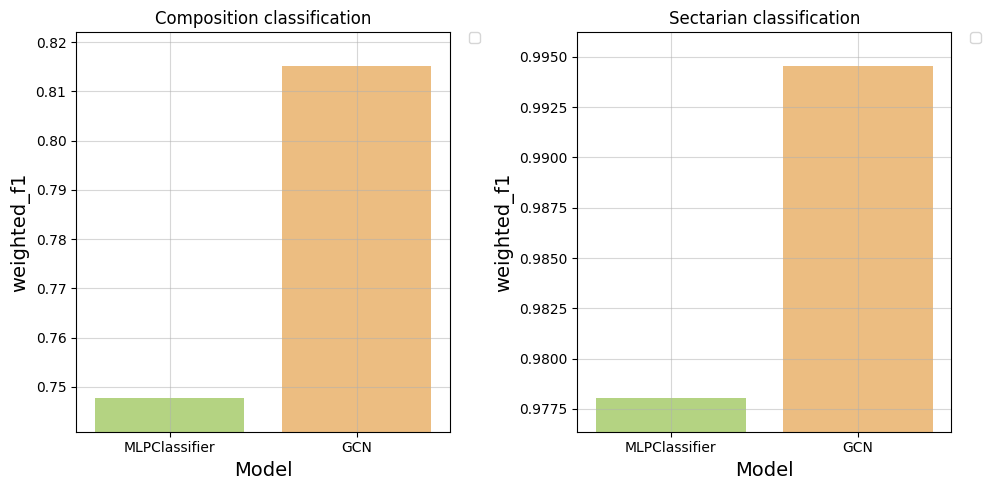

In [16]:
# all_results['model'] = all_results['model'].replace("MLPClassifier", "baseline")
color_map = generate_color_map(all_results, "model", "model", "RdYlGn", None)
# file_name = f"{BASE_DIR}/reports/plots/comparison/classification_comparison_composition_sectarian_minimal.png"
file_name = None
# hue_cols = list(all_results[all_results["model"]=="GCN"]["vectorizer"].unique())+["trigram"]
plot_obj = generate_bar_plot(all_results[all_results['task'] != "book"], "model", "weighted_f1", "model", "model",
                             color_map, filename=file_name, which_hue_cols=False)